# **Student Presentation**
Lo scopo di questa student presentation è stato quello di analizzare il Social Twitter, interfacciarsi con le sue API ed estrapolare e manipolare informazioni fornite dal social in questione.
Dopo aver creato e registrato l'applicazione su Twitter sono state fornite tutte quelle credenziali che permettono allo sviluppatore di interagire con le API.

In [1]:
import tweepy
from tweepy import Cursor
import numpy as np
import matplotlib.pyplot as plt
import re
import json
import datetime

In [2]:
CONSUMER_KEY = "UL1zUthNKOOV8x5gz78Gt6Oj6"
CONSUMER_SECRET = "Nm5zlfXgcTpxjGNYTLEDR9eymS1BsZWyOqXHlJm9Mn9mpopLUY"
ACCESS_TOKEN = "3299359689-HmGjdbqqnpASXLBkIUeOmx2TsLITn71GTpP820y"
ACCESS_TOKEN_SECRET = "TYiIAn4JmhzDu8ypJUB1Mf9YbEMuAgbiyBRPjNeCkZFFa"

## **Auth**

Definizione della classe che ci permette di autenticarci come sviluppatore, possessore di una determinata app, con Twitter.

In [3]:
class TwitterAuth():
    def authenticate_twitter_app(self):
        auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
        auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
        return auth

## **TwitterClient**

Nella classe TwitterClient vengono definiti tutti quei metodi che richiedono un qualche servizio a Twitter.
-  **get_user_timeline_tweets**: ritorna la timeline di un utente;
-  **get_followers_list**: ritorna la lista di follower di un utente;
-  **get_number_tweets_for_week**: ritorna il numero di tweet fatti in una settimana da un utente

In [4]:
class TwitterClient():
    def __init__(self,twitter_user=None):
        self.auth = TwitterAuth().authenticate_twitter_app()
        self.twitter_client = tweepy.API(self.auth)
        self.twitter_user = twitter_user
        
    def get_twitter_client_api(self):
        return self.twitter_client
    
    def get_user_timeline_tweets(self,num_tweets):
        tweets = []
        for tweet in Cursor(self.twitter_client.user_timeline, id=self.twitter_user).items(num_tweets):
            tweets.append(tweet)
        return tweets
    
    def get_friends_list(self, num_friends):
        friends = []
        for friend in Cursor(self.twitter_client.friends, id=self.twitter_user).items(num_friends):
            friends.append(friend)
        return friends
    
    def get_home_timeline_tweets(self,num_tweets):
        home_timeline_tweets = []
        for tweet in Cursor(self.twitter_client.home_timeline, id=self.twitter_user).items(num_tweets):
            home_timeline_tweets.append(tweet)
        return home_timeline_tweets
    
    def get_number_tweets_for_week(self,year,start_date,end_date):
        _year = year
        month_start = start_date[0]
        month_end = end_date[0]
        day_start = start_date[1]
        day_end = end_date[1]
        startDate = datetime.datetime(year, month_start, day_start, 0, 0, 0)
        endDate =   datetime.datetime(year, month_end, day_end, 0, 0, 0)
        tweets = []
        tmpTweets = api.user_timeline(self.twitter_user)
        counter = 0
        
        while (len(tmpTweets) != 0 and tmpTweets[-1].created_at > startDate):
            tmpTweets = api.user_timeline(self.twitter_user, max_id = tmpTweets[-1].id)
            for tweet in tmpTweets:
                if tweet.created_at < endDate and tweet.created_at > startDate:  
                    if "RT @" not in tweet.text:
                        counter = counter + 1  
                        tweets.append(tweet)
        print("\tFrom", startDate.strftime("%d/%m/%Y"), "to", endDate.strftime("%d/%m/%Y"), " --> # of tweet:",len(tweets))
        return counter
    
    def get_number_tweets_and_reetweet_for_week(self,year,start_date,end_date):
        _year = year
        month_start = start_date[0]
        month_end = end_date[0]
        day_start = start_date[1]
        day_end = end_date[1]
        startDate = datetime.datetime(year, month_start, day_start, 0, 0, 0)
        endDate =   datetime.datetime(year, month_end, day_end, 0, 0, 0)
        tweets = []
        tmpTweets = api.user_timeline(self.twitter_user)

        counter = 0

        while(len(tmpTweets) != 0 and tmpTweets[-1].created_at > startDate):
            tmpTweets = api.user_timeline(self.twitter_user, max_id = tmpTweets[-1].id)
            for tweet in tmpTweets:
                if tweet.created_at < endDate and tweet.created_at > startDate:  
                    counter = counter + 1  
                    tweets.append(tweet)
        print("\tFrom", startDate.strftime("%d/%m/%Y"), "to", endDate.strftime("%d/%m/%Y"), " --> # of tweet + retweet:",len(tweets))
        return counter

In [5]:
class User:
    def __init__(self,twitter_client, twitter_user):
        self.twitter_user = twitter_user
        self.twitter_client = twitter_client
        self.followers = 0
        self.tweets = []
        
    def set_followers(self,followers):
        self.followers = followers
    

In [6]:
# twitter_username
m5s = "Mov5Stelle"
lega = "LegaSalvini"
PD =  "pdnetwork"
year = 2019
# [month,day]
start_date = [[7,10],[7,18]] 
end_date = [[7,19],[7,25]] 
followers = []
twitter_username = ["Mov5Stelle","LegaSalvini","pdnetwork"]
twitter_clients = []

for i in range(len(twitter_username)):
    twitter_clients.append(User(TwitterClient(twitter_username[i]),twitter_username[i]))

## Numero di Followers e grafico

Estrazione del numero di followers e rappresentazione grafica dell'informazione.

User Mov5Stelle has 662156 followers
User LegaSalvini has 73610 followers
User pdnetwork has 303348 followers


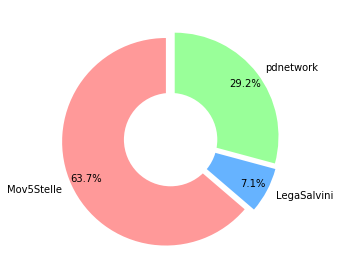

In [7]:
for i in range(len(twitter_clients)):
    tweet = twitter_clients[i].twitter_client.get_user_timeline_tweets(1)
    print("User",twitter_clients[i].twitter_user,"has", tweet[0]._json["user"]["followers_count"],"followers")
    twitter_clients[i].set_followers(tweet[0]._json["user"]["followers_count"])

labels = []
followers = []
for i in range(len(twitter_clients)):
    labels.append(twitter_clients[i].twitter_user)
    followers.append(twitter_clients[i].followers)

colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.05,0.05,0.05)
plt.pie(followers, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

### Osservazione

Le API fornite da Twitter **non** permettono di recupeare i tweet di un utente tra due date specificate. E' **sconsigliato** cercare di recuperare tweet creati in date molto passate, per due semplici motivi: dato che devono essere esaminati tutti i tweet fino alla data che ci interessa, questa analisi fa aumentare il tempo di esecuzione in rapporto al numero di tweet da esaminare, più indietro nel tempo si va più tweet da analizzare si hanno. E il secondo motivo è che si potrebbe superare il numero di richieste alle API imposte da Twitter.

In [8]:
#for i in range(len(twitter_clients)):
    #api = twitter_clients[i].twitter_client.get_twitter_client_api()
    #print("******** " + twitter_clients[i].twitter_user +": Getting number of Tweet.... ********")
    #for j in range(len(start_date)):
        #twitter_clients[i].tweets.append( twitter_clients[i].twitter_client.get_number_tweets_for_week(year,start_date[j],end_date[j])) 
    #print("\n")

In [9]:
for i in range(len(twitter_clients)):
    api = twitter_clients[i].twitter_client.get_twitter_client_api()
    print("******** " + twitter_clients[i].twitter_user +": Getting number of Tweet and Retweet.... ********")
    for j in range(len(start_date)):
        twitter_clients[i].tweets.append(twitter_clients[i].twitter_client.get_number_tweets_and_reetweet_for_week(year,start_date[j],end_date[j])) 
    print("\n")

******** Mov5Stelle: Getting number of Tweet and Retweet.... ********
	From 10/07/2019 to 19/07/2019  --> # of tweet + retweet: 217
	From 18/07/2019 to 25/07/2019  --> # of tweet + retweet: 92


******** LegaSalvini: Getting number of Tweet and Retweet.... ********
	From 10/07/2019 to 19/07/2019  --> # of tweet + retweet: 353
	From 18/07/2019 to 25/07/2019  --> # of tweet + retweet: 599


******** pdnetwork: Getting number of Tweet and Retweet.... ********
	From 10/07/2019 to 19/07/2019  --> # of tweet + retweet: 301
	From 18/07/2019 to 25/07/2019  --> # of tweet + retweet: 189




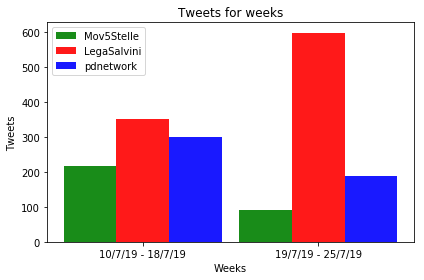

In [10]:
# data to plot
n_groups = 2
tweets_reetweet_m5s = tuple(twitter_clients[0].tweets)
tweets_reetweet_lega = tuple(twitter_clients[1].tweets)
tweets_reetweet_pd = tuple(twitter_clients[2].tweets)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.9
rects1 = plt.bar(index, tweets_reetweet_m5s, bar_width,
alpha=opacity,
color='g',
label=twitter_username[0])

rects2 = plt.bar(index + bar_width, tweets_reetweet_lega, bar_width,
alpha=opacity,
color='r',
label=twitter_username[1])

rects3 = plt.bar(index + 2*bar_width, tweets_reetweet_pd, bar_width,
alpha=opacity,
color='b',
label=twitter_username[2])

plt.xlabel('Weeks')
plt.ylabel('Tweets')
plt.title('Tweets for weeks')
#plt.xticks(index + bar_width, ('1/4/19 - 7/4/19', '1/4/19 - 7/4/19', '1/4/19 - 7/4/19', '1/4/19 - 9/4/19'))
plt.xticks(index + bar_width, ('10/7/19 - 18/7/19','19/7/19 - 25/7/19'))
plt.legend()

plt.tight_layout()
plt.show()